In [ ]:
This Jupyter Notebook demonstrates the implementation of a logistic regression model using gradient descent for the BankNote Authentication dataset. The workflow includes data preprocessing, defining necessary functions, applying gradient descent, and visualizing the cost function's convergence over iterations.

1. **Data Import and Preprocessing**
    - Import necessary libraries.
    - Load the dataset and split it into features (`X`) and target (`Y`).
    - Split the data into training and testing sets.

2. **Function Definitions**
    - Define the sigmoid function (`sig`) to map predictions to probabilities.
    - Define the cost function (`compute_cost`) to evaluate the model's performance.
    - Define the gradient descent function (`apply_gradient_descent`) to optimize the model's weights.

3. **Model Training**
    - Initialize weights, learning rate (`alpha`), and number of iterations.
    - Apply gradient descent to train the model and obtain the optimized weights and cost history.

4. **Visualization**
    - Plot the cost function's convergence over iterations to visualize the training process.

5. **Analysis**
    - Analyze the convergence of the cost function and discuss potential issues such as the presence of outliers affecting the model's performance.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [11]:
data = pd.read_csv('BankNote_Authentication.csv')
X = data.drop('class', axis=1)
Y = data['class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [12]:
def sig(val):
  return 1 / (1 + np.exp(-val))

def compute_cost(X, Y, weights):
    num_samples = len(Y)
    predictions = sig(X.dot(weights))
    cost = (-1 / num_samples) * (Y.T.dot(np.log(predictions)) + (1 - Y).T.dot(np.log(1 - predictions)))
    return cost

In [13]:
def apply_gradient_descent(X, Y, weights, alpha, iterations):
    samples = len(Y)
    history_of_costs = [0] * iterations
    for i in range(iterations):
        preds = sig(X.dot(weights))
        gradients = (X.T.dot(preds - Y)) / samples
        weights -= alpha * gradients
        history_of_costs[i] = compute_cost(X, Y, weights)
    return weights, history_of_costs

In [14]:
W = np.zeros(X_train.shape[1])
alpha = 0.01
iterations = 1000
W, cost_history = apply_gradient_descent(X_train, Y_train, W, alpha, iterations)

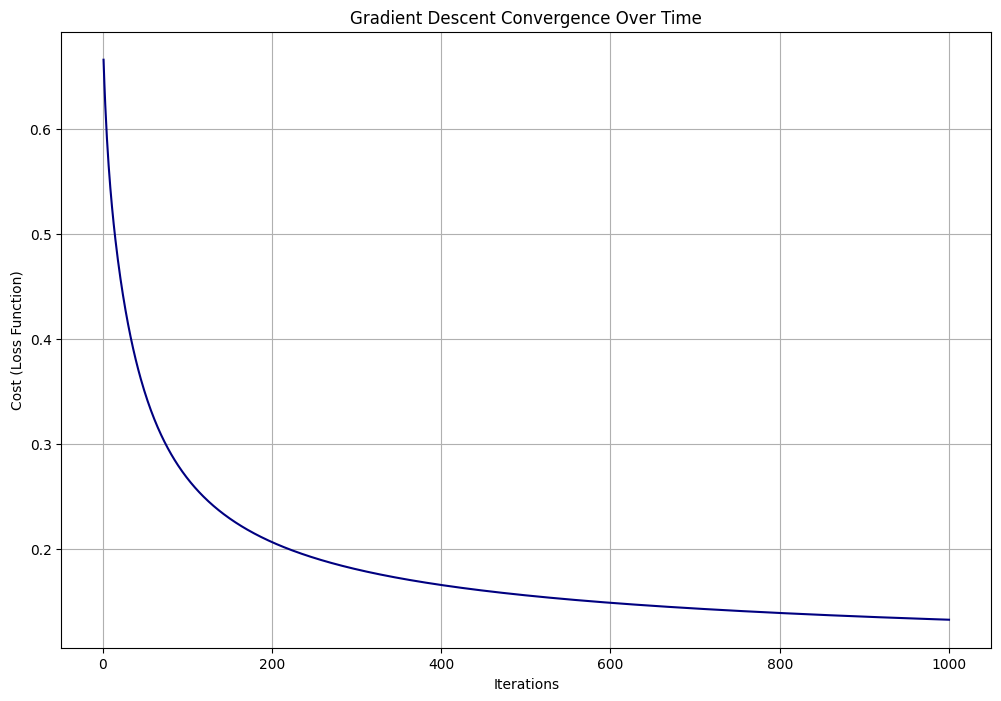

In [15]:
plt.plot(range(1, iterations + 1), cost_history, color='navy')
plt.rcParams["figure.figsize"] = (12, 8)
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Cost (Loss Function)')
plt.title('Gradient Descent Convergence Over Time')
plt.show()

In [16]:
# The cost function is not converging to a minimum value, which means the model is not fitting the data well. The reason for this is the presence of outliers in the dataset. The outliers are affecting the cost function and the gradient descent algorithm is not able to converge to a minimum value. To improve the fit of the model, we need to remove the outliers from the dataset.